## Web Scraping using python and beautifulsoup4

In [126]:
from bs4 import BeautifulSoup as bs
import requests

In [127]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize 

In [128]:
import numpy as np
import pandas as pd

### Import Table Data and Converting It into a Nested List

In [129]:
res = requests.get('https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?')

In [130]:
soup = bs(res.text, "lxml")

In [131]:
table = soup.find('table')

In [132]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="Nor

In [133]:
t_col = table.find_all('th')

In [134]:
t_rows = table.find_all('tr')

In [135]:
for th in t_col:
    print(th.text)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl
1 Deathevery X ppl
1 Testevery X ppl


In [136]:
for tr in t_rows:
    print(tr.text)


#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl




North America

11,386,473
+67,477
354,005
+564
7,520,801
+45,587
3,511,667
20,959





North America








Asia

13,847,945
+80,824
245,840
+1,467
12,347,530
+90,735
1,254,575
22,152





Asia








South America

9,719,358
+9,901
295,739
+210
8,673,572
+1,704
750,047
18,249





South America








Europe

10,443,237
+242,034
269,952
+2,207
3,899,688
+60,042
6,273,597
22,459





Europe








Africa

1,812,985
+7,165
43,442
+198
1,480,577
+7,819
288,966
2,337





Africa








Oceania

37,493
+15
970

32,688
+14
3,835
25





Australia/Oceania










721

15

659

47
4













World
47,248,212
+407,416
1,209,963
+4,646
33,955,515
+205,901
12,082,734
86,185
6,062
155.2



All






1
USA
9,537,738
+59,175
236,859 
+383
6,

In [137]:
# converting table data into nested list
rows = []
for tr in t_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    rows.append(row)

In [138]:
rows

[[],
 ['',
  '\nNorth America\n',
  '11,386,473',
  '+67,477',
  '354,005',
  '+564',
  '7,520,801',
  '+45,587',
  '3,511,667',
  '20,959',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '\n',
  '',
  ''],
 ['',
  '\nAsia\n',
  '13,847,945',
  '+80,824',
  '245,840',
  '+1,467',
  '12,347,530',
  '+90,735',
  '1,254,575',
  '22,152',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '\n',
  '',
  ''],
 ['',
  '\nSouth America\n',
  '9,719,358',
  '+9,901',
  '295,739',
  '+210',
  '8,673,572',
  '+1,704',
  '750,047',
  '18,249',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '\n',
  '',
  ''],
 ['',
  '\nEurope\n',
  '10,443,237',
  '+242,034',
  '269,952',
  '+2,207',
  '3,899,688',
  '+60,042',
  '6,273,597',
  '22,459',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '\n',
  '',
  ''],
 ['',
  '\nAfrica\n',
  '1,812,985',
  '+7,165',
  '43,442',
  '+198',
  '1,480,577',
  '+7,819',
  '288,966',
  '2,337',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '\n',
  '',
  ''],
 ['',
  '\nOceani

In [139]:
rows_values = rows[1:]

In [140]:
rows_values

[['',
  '\nNorth America\n',
  '11,386,473',
  '+67,477',
  '354,005',
  '+564',
  '7,520,801',
  '+45,587',
  '3,511,667',
  '20,959',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '\n',
  '',
  ''],
 ['',
  '\nAsia\n',
  '13,847,945',
  '+80,824',
  '245,840',
  '+1,467',
  '12,347,530',
  '+90,735',
  '1,254,575',
  '22,152',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '\n',
  '',
  ''],
 ['',
  '\nSouth America\n',
  '9,719,358',
  '+9,901',
  '295,739',
  '+210',
  '8,673,572',
  '+1,704',
  '750,047',
  '18,249',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '\n',
  '',
  ''],
 ['',
  '\nEurope\n',
  '10,443,237',
  '+242,034',
  '269,952',
  '+2,207',
  '3,899,688',
  '+60,042',
  '6,273,597',
  '22,459',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '\n',
  '',
  ''],
 ['',
  '\nAfrica\n',
  '1,812,985',
  '+7,165',
  '43,442',
  '+198',
  '1,480,577',
  '+7,819',
  '288,966',
  '2,337',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '\n',
  '',
  ''],
 ['',
  '\nOceania\n',

In [141]:
# removing unneccesary values from nested list
row_list = []
for i in range(len(rows_values)):
    r = []
    for j in range(len(rows_values[0])):
        r1 = rows_values[i][j].replace('\n' ,'')
        r2 = r1.replace(',' ,'')
        r.append(r2)
    
    row_list.append(r)

In [142]:
row_list

[['',
  'North America',
  '11386473',
  '+67477',
  '354005',
  '+564',
  '7520801',
  '+45587',
  '3511667',
  '20959',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '',
  '',
  ''],
 ['',
  'Asia',
  '13847945',
  '+80824',
  '245840',
  '+1467',
  '12347530',
  '+90735',
  '1254575',
  '22152',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  ''],
 ['',
  'South America',
  '9719358',
  '+9901',
  '295739',
  '+210',
  '8673572',
  '+1704',
  '750047',
  '18249',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '',
  '',
  ''],
 ['',
  'Europe',
  '10443237',
  '+242034',
  '269952',
  '+2207',
  '3899688',
  '+60042',
  '6273597',
  '22459',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '',
  '',
  ''],
 ['',
  'Africa',
  '1812985',
  '+7165',
  '43442',
  '+198',
  '1480577',
  '+7819',
  '288966',
  '2337',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '',
  '',
  ''],
 ['',
  'Oceania',
  '37493',
  '+15',
  '970',
  '',
  '32688',
  '+14',
  '3835',
  '25',
  '',
  ''

### Import Table Data in a Dataframe

In [143]:
df = pd.DataFrame(data = row_list)

In [144]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,North America,11386473,+67477,354005,+564,7520801,+45587,3511667,20959,,,,,,North America,,,
1,,Asia,13847945,+80824,245840,+1467,12347530,+90735,1254575,22152,,,,,,Asia,,,
2,,South America,9719358,+9901,295739,+210,8673572,+1704,750047,18249,,,,,,South America,,,
3,,Europe,10443237,+242034,269952,+2207,3899688,+60042,6273597,22459,,,,,,Europe,,,
4,,Africa,1812985,+7165,43442,+198,1480577,+7819,288966,2337,,,,,,Africa,,,
5,,Oceania,37493,+15,970,,32688,+14,3835,25,,,,,,Australia/Oceania,,,
6,,,721,,15,,659,,47,4,,,,,,,,,
7,,World,47248212,+407416,1209963,+4646,33955515,+205901,12082734,86185,6062,155.2,,,,All,,,
8,1,USA,9537738,+59175,236859,+383,6141066,+37442,3159813,17281,28758,714,145996522,440201,331658650,North America,35,1400,2
9,2,India,8266914,+37592,123139,+497,7601429,+58524,542346,8944,5971,89,110743103,79984,1384567503,Asia,167,11244,13


In [145]:
df.tail(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
219,212,Solomon Islands,13,+5,,,4,,9,,19,,115,166,692441,Australia/Oceania,53265,,6021
220,213,Western Sahara,10,,1,,8,,1,,17,2,,,602183,Africa,60218,602183,
221,214,MS Zaandam,9,,2,,,,7,,,,,,,,,,
222,215,Anguilla,3,,,,3,,0,,199,,1329,88317,15048,North America,5016,,11
223,216,Marshall Islands,2,,,,,,2,,34,,,,59325,Australia/Oceania,29663,,
224,217,Wallis and Futuna,1,,,,1,,0,,90,,1046,93635,11171,Australia/Oceania,11171,,11
225,218,China,86021,+24,4634,,81024,+20,363,12,60,3,160000000,111163,1439323776,Asia,16732,310601,9
226,,Total:,11386473,+67477,354005,+564,7520801,+45587,3511667,20959,,,,,,North America,,,
227,,Total:,13847945,+80824,245840,+1467,12347530,+90735,1254575,22152,,,,,,Asia,,,
228,,Total:,9719358,+9901,295739,+210,8673572,+1704,750047,18249,,,,,,South America,,,


In [146]:
df1 = df.iloc[8:222,]

In [147]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
8,1,USA,9537738,+59175,236859,+383,6141066,+37442,3159813,17281,28758,714,145996522,440201,331658650,North America,35,1400,2
9,2,India,8266914,+37592,123139,+497,7601429,+58524,542346,8944,5971,89,110743103,79984,1384567503,Asia,167,11244,13
10,3,Brazil,5554206,+8501,160253,+149,4980942,,413011,8318,26068,752,21900000,102783,213069306,South America,38,1330,10
11,4,Russia,1655038,+18257,28473,+238,1236033,+10360,390532,2300,11339,195,61541970,421648,145955748,Europe,88,5126,2
12,5,France,1466433,+52518,37435,+416,119104,+877,1309894,3730,22449,573,16540372,253211,65322540,Europe,45,1745,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,210,Montserrat,13,,1,,12,,0,,2604,200,483,96735,4993,North America,384,4993,10
218,211,Falkland Islands,13,,,,13,,0,,3701,,2682,763450,3513,South America,270,,1
219,212,Solomon Islands,13,+5,,,4,,9,,19,,115,166,692441,Australia/Oceania,53265,,6021
220,213,Western Sahara,10,,1,,8,,1,,17,2,,,602183,Africa,60218,602183,


In [148]:
all_corona = df1[[1,2,4,6,8,12,15,14,13,11,3]]

In [149]:
df_col = ['Country','Total Case','Total Death','Total Recovered','Active Case','Total Test','Continent','Population','TestperM','DeathperM','New Cases']

In [150]:
all_corona.columns = df_col

In [151]:
all_corona = all_corona.reset_index(drop=True)

In [152]:
all_corona.head(15)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,Population,TestperM,DeathperM,New Cases
0,USA,9537738,236859,6141066,3159813,145996522,North America,331658650,440201,714,+59175
1,India,8266914,123139,7601429,542346,110743103,Asia,1384567503,79984,89,+37592
2,Brazil,5554206,160253,4980942,413011,21900000,South America,213069306,102783,752,+8501
3,Russia,1655038,28473,1236033,390532,61541970,Europe,145955748,421648,195,+18257
4,France,1466433,37435,119104,1309894,16540372,Europe,65322540,253211,573,+52518
5,Spain,1313087,36257,N/A,N/A,18072174,Europe,46760938,386480,775,+18340
6,Argentina,1173533,31140,985316,157077,3022449,South America,45335371,66669,687,
7,Colombia,1083321,31515,977804,74002,5095049,South America,51065104,99776,617,
8,UK,1053864,46853,N/A,N/A,34400076,Europe,68006623,505834,689,+18950
9,Mexico,929392,91895,682044,155453,2410306,North America,129387958,18629,710,+4430


In [153]:
all_corona.tail(15)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,Population,TestperM,DeathperM,New Cases
199,Macao,46,,46,0,4238,Asia,652298,6497,,
200,Fiji,34,2,31,1,12527,Australia/Oceania,898637,13940,2,
201,Timor-Leste,30,,29,1,11268,Asia,1326791,8493,,
202,Grenada,28,,24,4,6252,North America,112699,55475,,
203,New Caledonia,28,,28,0,15750,Australia/Oceania,286421,54989,,
204,Vatican City,27,,15,12,,Europe,802,,,
205,Laos,24,,23,1,66366,Asia,7310856,9078,,
206,Saint Kitts and Nevis,19,,19,0,3138,North America,53326,58846,,
207,Greenland,17,,16,1,10996,North America,56803,193581,,
208,Saint Pierre Miquelon,16,,12,4,2404,North America,5784,415629,,


In [154]:
countries = list(all_corona["Country"])
l = len(countries)

In [155]:
all_corona.isna().sum()

Country            0
Total Case         0
Total Death        0
Total Recovered    0
Active Case        0
Total Test         0
Continent          0
Population         0
TestperM           0
DeathperM          0
New Cases          0
dtype: int64

In [156]:
all_corona.to_csv('data0310.csv')

In [157]:
df_corona = all_corona.copy()
df_corona.drop(['TestperM','DeathperM'],axis = 1,inplace = True)

In [158]:
df_corona.head(5)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,New Cases
0,USA,9537738,236859,6141066,3159813,145996522,North America,+59175
1,India,8266914,123139,7601429,542346,110743103,Asia,+37592
2,Brazil,5554206,160253,4980942,413011,21900000,South America,+8501
3,Russia,1655038,28473,1236033,390532,61541970,Europe,+18257
4,France,1466433,37435,119104,1309894,16540372,Europe,+52518


In [159]:
df_corona.tail()

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,New Cases
209,Montserrat,13,1,12,0,483,North America,
210,Falkland Islands,13,,13,0,2682,South America,
211,Solomon Islands,13,,4,9,115,Australia/Oceania,+5
212,Western Sahara,10,1,8,1,,Africa,
213,MS Zaandam,9,2,,7,,,


In [160]:
df_corona.isna().sum()

Country            0
Total Case         0
Total Death        0
Total Recovered    0
Active Case        0
Total Test         0
Continent          0
New Cases          0
dtype: int64

In [161]:
df_corona.replace(to_replace = ' ', value = 0, inplace = True)
df_corona.replace(to_replace = '', value = 0, inplace = True)
df_corona.replace(to_replace = 'N/A', value = 0, inplace = True)

In [162]:
df_corona.tail()

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,New Cases
209,Montserrat,13,1,12,0,483,North America,0
210,Falkland Islands,13,0,13,0,2682,South America,0
211,Solomon Islands,13,0,4,9,115,Australia/Oceania,+5
212,Western Sahara,10,1,8,1,0,Africa,0
213,MS Zaandam,9,2,0,7,0,0,0


In [163]:
df_corona['Total Case'] = df_corona['Total Case'].astype('int')
df_corona['Total Death'] = df_corona['Total Death'].astype('int')
df_corona['Total Recovered'] = df_corona['Total Recovered'].astype('int')
df_corona['Total Test'] = df_corona['Total Test'].astype('int')
df_corona['Active Case'] = df_corona['Active Case'].astype('int')

In [164]:
df_corona['Continent'] = df_corona['Continent'].astype('str')

In [165]:
# data types in df2
df_corona.dtypes

Country            object
Total Case          int32
Total Death         int32
Total Recovered     int32
Active Case         int32
Total Test          int32
Continent          object
New Cases          object
dtype: object

In [166]:
df_corona.shape

(214, 8)

In [167]:
countries = list(df_corona["Country"])
l = len(countries)

In [168]:
latitudes = []
longitudes = []

for i in range(l):
    country = countries[i]
    address = country

    geolocator = Nominatim(user_agent="world_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    latitudes.append(latitude)
    longitudes.append(longitude)
    
print(latitudes)
print(longitudes)

[39.7837304, 22.3511148, -10.3333333, 64.6863136, 46.603354, 39.3262345, -34.9964963, 2.8894434, 54.7023545, 19.4326296, -6.8699697, 42.6384261, -28.8166236, 32.6475314, 51.0834196, -31.7613365, 33.0955793, 50.6402809, -2.4833826, 24.4768783, 49.4871968, 52.215933, 12.7503486, 38.9597594, 52.5001698, 25.6242618, 49.8167003, 30.3308401, 31.5313113, 45.9852129, 61.0666922, 31.1728205, 28.1083929, 46.7985624, -1.3397668, 40.0332629, -17.0568696, 49.4871968, 8.559559, 25.3336984, 19.0974031, 29.2733964, 59.6749712, 21.0000287, 47.2000338, 47.2286086, 10.2735633, 15.6356088, 26.2540493, 36.5748441, 53.4250605, 15.2572432, 10.2116702, 40.7696272, 8.0018709, 47.1817585, 33.8750629, 26.1551249, 31.1667049, 47.2879608, 41.32373, -23.3165935, 9.6000359, 26.8234472, 52.865196, 33.8439408, 48.7411522, 41.5089324, 28.0000272, 1.3408630000000001, 40.3936294, 1.4419683, 31.94696655, 17.1750495, 42.6073975, 45.5643442, 44.3053476, 44.024322850000004, 55.670249, 8.0300284, 32.3293809, 38.9953683, 33.76

In [169]:
df_corona.insert(loc = 1,column='latitudes', value=latitudes)
df_corona.insert(loc = 2,column='longitudes', value=longitudes)

In [170]:
import folium

In [172]:
world_map = folium.Map()

for lat, lng, borough, r in zip(df_corona['latitudes'], df_corona['longitudes'], 
                                           df_corona['Country'],df_corona['Total Case']):
    
    folium.CircleMarker([lat, lng], r/800000, fill=False).add_child(folium.Popup(borough)).add_to(world_map)

    
world_map

In [173]:
world_map = folium.Map()

for lat, lng, borough, r in zip(df_corona['latitudes'], df_corona['longitudes'], 
                                           df_corona['Country'],df_corona['Total Case']):
    
    label = borough
    label = folium.Popup(label+' ('+str(r)+')', parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=r/1000000,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
    
world_map

In [174]:
df_corona

,Country,latitudes,longitudes,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,New Cases
0,USA,39.783730,-100.445882,9537738,236859,6141066,3159813,145996522,North America,+59175
1,India,22.351115,78.667743,8266914,123139,7601429,542346,110743103,Asia,+37592
2,Brazil,-10.333333,-53.200000,5554206,160253,4980942,413011,21900000,South America,+8501
3,Russia,64.686314,97.745306,1655038,28473,1236033,390532,61541970,Europe,+18257
4,France,46.603354,1.888334,1466433,37435,119104,1309894,16540372,Europe,+52518
...,...,...,...,...,...,...,...,...,...,...
209,Montserrat,16.741704,-62.191684,13,1,12,0,483,North America,0
210,Falkland Islands,-51.966642,-59.550039,13,0,13,0,2682,South America,0
211,Solomon Islands,-8.705394,159.107110,13,0,4,9,115,Australia/Oceania,+5
212,Western Sahara,24.118866,-13.950892,10,1,8,1,0,Africa,0


In [175]:
df_covid = df_corona.set_index('Country')

In [176]:
df_covid

,latitudes,longitudes,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,New Cases
Country,,,,,,,,,
USA,39.783730,-100.445882,9537738,236859,6141066,3159813,145996522,North America,+59175
India,22.351115,78.667743,8266914,123139,7601429,542346,110743103,Asia,+37592
Brazil,-10.333333,-53.200000,5554206,160253,4980942,413011,21900000,South America,+8501
Russia,64.686314,97.745306,1655038,28473,1236033,390532,61541970,Europe,+18257
France,46.603354,1.888334,1466433,37435,119104,1309894,16540372,Europe,+52518
...,...,...,...,...,...,...,...,...,...
Montserrat,16.741704,-62.191684,13,1,12,0,483,North America,0
Falkland Islands,-51.966642,-59.550039,13,0,13,0,2682,South America,0
Solomon Islands,-8.705394,159.107110,13,0,4,9,115,Australia/Oceania,+5


In [177]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

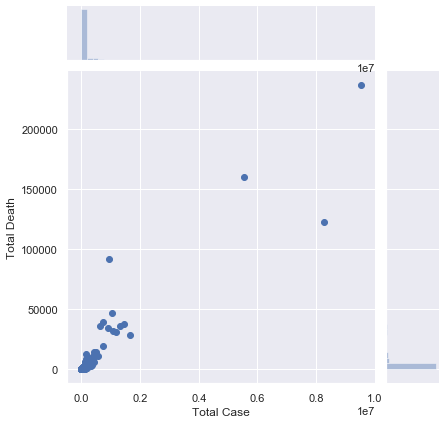

In [178]:
sns.jointplot(x='Total Case',y='Total Death',data=df_corona,kind='scatter')

c:\users\shail\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


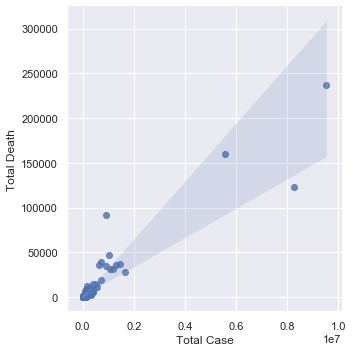

In [179]:
sns.lmplot(x='Total Case',y='Total Death',data=df_corona)

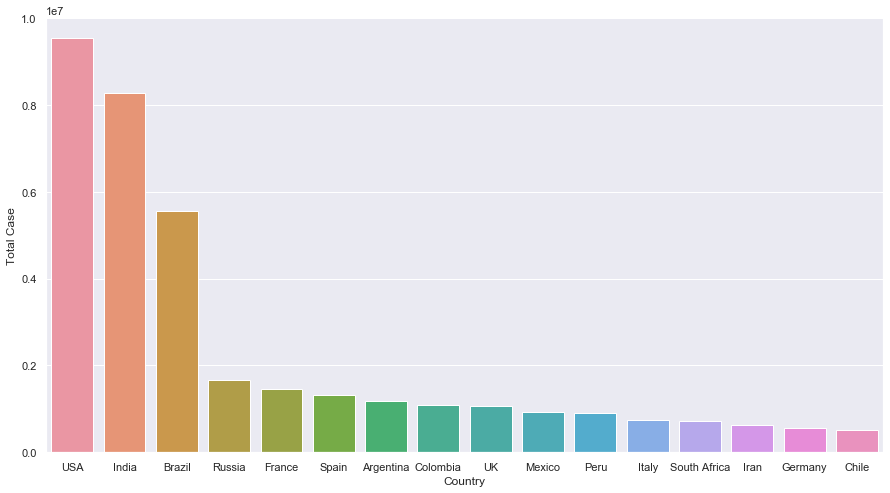

In [180]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Country',y='Total Case',data=df_corona.iloc[0:16,])


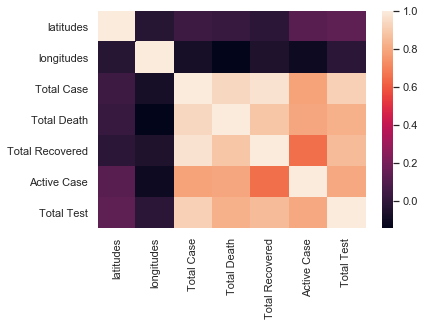

In [181]:
sns.heatmap(df_covid.corr())

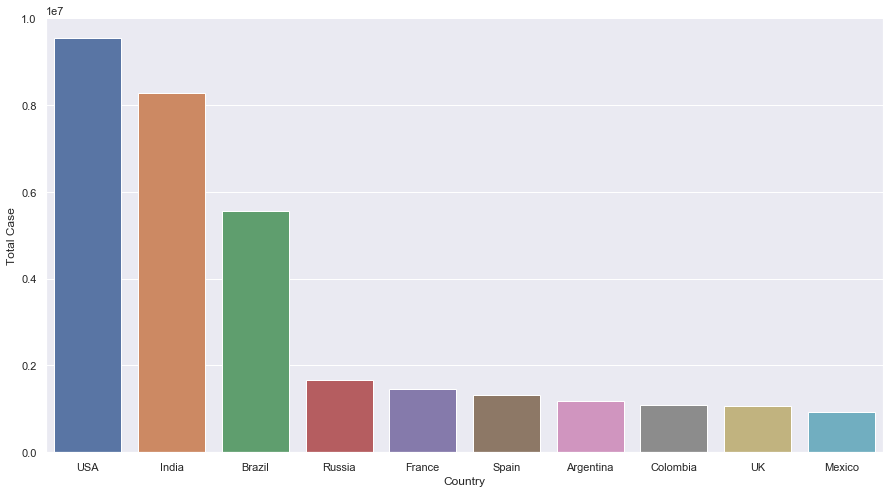

In [182]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Country',y='Total Case',data=df_corona.iloc[0:10,])

In [183]:
plot_corona = all_corona[['Country','Total Case','Total Death','Total Recovered','Active Case','New Cases']]

In [184]:
plot_corona.head()

,Country,Total Case,Total Death,Total Recovered,Active Case,New Cases
0,USA,9537738,236859,6141066,3159813,+59175
1,India,8266914,123139,7601429,542346,+37592
2,Brazil,5554206,160253,4980942,413011,+8501
3,Russia,1655038,28473,1236033,390532,+18257
4,France,1466433,37435,119104,1309894,+52518
